In [1]:
# Importing all modules required

import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
import seaborn as sns
import plotly.express as px
from datetime import datetime


In [2]:
# Reading the file into a variable
with open('sat1_sspa.txt') as f:
    data = f.readlines()


In [3]:
columns = ['Year','Day','Hour','Minutes','Seconds','Milliseconds','unknown']
# Values that have to be replaced by 1 while preprocessing. All negative values are replaced by 0
positive_value = ['ON','TRUE','OVER','UNLOCK','SEL','ANT-1']

rows = []
for i in data:
    # if line that is being read contains _, its a column name
    if '_' in i:
        columns.append(i.strip())
    elif len(i.split("\t"))>5:
        #Split the line at tab space (\t) and format the date
        new_list = [j.strip() for j in i.split("\t") if j not in ['',0,'\n']]
        date = new_list[0].split(' ')
        date_string = str(date[1]) + " " +  str(date[0]) + " " +  str(date[2]) + " " +  str(date[3]) + " " +  str(date[4]) + " " +  str(date[5])
        date_object = datetime.strptime(date_string, "%j %Y %H %M %S %f")
        new_list = new_list[1:]
        date_str = date_object.strftime("%Y-%m-%d %H %M %S %f")
        new_list.insert(0, date[-1])
        new_list.insert(0, date_object)
        
        # Replacing positve values with and negative with 0 for better analysing
        for j in range(6,len(new_list),1):
            if new_list[j] in positive_value:
                new_list[j] = '1'
            else: 
                new_list[j] = '0'
            
        rows.append(new_list)


        
        

        

In [4]:
#Make date one column instead of different columns for date, year, time etc.
columns = ['Date']+columns[6:]

In [5]:
#Create the dataframe
df = pd.DataFrame()    
for j in range(len(columns)):
    col_data = []
    for i in rows:
        # If no value is found, replace with Not a number, This will later be replaced by the mean of values in the column
        if type(i[j]) == str and i[j].strip() == '':
            i[j] = np.nan
        # First column is date, convert all values into float except for the first column
        if j >= 1:
            col_data.append(float(i[j]))
        else: 
            col_data.append(i[j])
    df[columns[j]] = col_data
    
#Set date as index for dataframe instead of 0,1,2,3,4...
df.set_index('Date', inplace=True)
original_df = df.copy()
deviation_df = df.copy()

for column in df.columns:
    # Filling blank values with mean
    df[column].fillna(value = df[column].mean(), inplace=True)

In [6]:
# Display the df (Optional)
display(df)

,unknown,BAT_VOL_R_FINE,BAT_VOL_R_COARSE,BUS_VOL,BAT_VOL_M_FINE,BAT_VOL_M_COARSE,BAT_CUR_COARSE,BAT_CUR_FINE,SA_CUR,DER_RATE_PCH,...,X-TRANSMITTER_(VD01),X-SSPA_SINK_PLT_(VD0,MEP_EXE,SSPA_ON_STS,DATA_TX_LOCK_STS,XBS_ANT_SEL_STS,MEP_EXE_STS,DATA_TX_ON_STS,PLD_TX-1_SEL_STS,SSPA_SEL_STS
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-15 00:00:27.094,0.0,40.074196,40.048756,40.05798,40.88,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-05-15 00:00:27.606,1.0,40.880000,40.870000,40.05798,40.88,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-05-15 00:00:28.118,2.0,40.880000,40.870000,40.05798,40.88,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-05-15 00:00:29.142,4.0,40.880000,40.870000,40.05798,40.88,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-05-15 00:00:30.166,6.0,40.880000,40.870000,40.05798,40.88,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-16 23:59:56.936,19.0,40.840000,40.800000,40.97500,40.81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.448,20.0,40.840000,40.800000,40.97500,40.81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.960,21.0,40.840000,40.800000,40.97500,40.81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [7]:
# Normalization


# Min-max 
for column in df:    
    #Only normalize if non digital value
    if df[column].max() != 1 and df[column].min() != 0:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    
        
display(df)


,unknown,BAT_VOL_R_FINE,BAT_VOL_R_COARSE,BUS_VOL,BAT_VOL_M_FINE,BAT_VOL_M_COARSE,BAT_CUR_COARSE,BAT_CUR_FINE,SA_CUR,DER_RATE_PCH,...,X-TRANSMITTER_(VD01),X-SSPA_SINK_PLT_(VD0,MEP_EXE,SSPA_ON_STS,DATA_TX_LOCK_STS,XBS_ANT_SEL_STS,MEP_EXE_STS,DATA_TX_ON_STS,PLD_TX-1_SEL_STS,SSPA_SEL_STS
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-15 00:00:27.094,0.0,0.743418,0.914316,0.953689,0.815402,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-05-15 00:00:27.606,1.0,0.891544,0.967575,0.953689,0.815402,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-05-15 00:00:28.118,2.0,0.891544,0.967575,0.953689,0.815402,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-05-15 00:00:29.142,4.0,0.891544,0.967575,0.953689,0.815402,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-05-15 00:00:30.166,6.0,0.891544,0.967575,0.953689,0.815402,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-16 23:59:56.936,19.0,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.448,20.0,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.960,21.0,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [12]:
# Dropping unknown column because it is causing inconsistencies
df = df.drop('unknown', axis=1)

In [13]:
# Principal Component analysis
pca = PCA()
pca.fit_transform(df)
# explained_variance_ratio_ gives numerical representation of significance of each parameter
pca.explained_variance_ratio_

,BAT_VOL_R_FINE,BAT_VOL_R_COARSE,BUS_VOL,BAT_VOL_M_FINE,BAT_VOL_M_COARSE,BAT_CUR_COARSE,BAT_CUR_FINE,SA_CUR,DER_RATE_PCH,DER_RATE_ROL,...,X-TRANSMITTER_(VD01),X-SSPA_SINK_PLT_(VD0,MEP_EXE,SSPA_ON_STS,DATA_TX_LOCK_STS,XBS_ANT_SEL_STS,MEP_EXE_STS,DATA_TX_ON_STS,PLD_TX-1_SEL_STS,SSPA_SEL_STS
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-15 00:00:27.094,0.743418,0.914316,0.953689,0.815402,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-05-15 00:00:27.606,0.891544,0.967575,0.953689,0.815402,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-05-15 00:00:28.118,0.891544,0.967575,0.953689,0.815402,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-05-15 00:00:29.142,0.891544,0.967575,0.953689,0.815402,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-05-15 00:00:30.166,0.891544,0.967575,0.953689,0.815402,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-16 23:59:56.936,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.448,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.960,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


array([4.74530630e-01, 2.53288129e-01, 1.80155401e-01, 4.96718826e-02,
       3.84168260e-02, 1.88958216e-03, 1.28069483e-03, 4.12328562e-04,
       1.38870592e-04, 1.15838045e-04, 8.08771427e-05, 1.89400677e-05,
       6.50605820e-35, 7.21946243e-36, 3.68772246e-36, 2.20595481e-36,
       1.02319807e-37, 9.78579810e-39, 1.06588904e-41, 9.51770588e-43,
       8.84095551e-68, 1.57952455e-68, 2.44606138e-69, 4.66002494e-71])

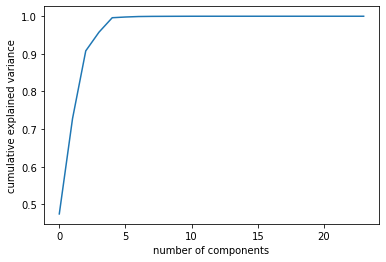

In [14]:
# PCA Plot 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [15]:
# Prinicpal components required to cover 99% of data
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(df) # this will fit and reduce dimensions
print('Number of Prinicpal components required to cover 99% of data: ',pca.n_components_)
display(df)

Number of Prinicpal components required to cover 99% of data:  5


,BAT_VOL_R_FINE,BAT_VOL_R_COARSE,BUS_VOL,BAT_VOL_M_FINE,BAT_VOL_M_COARSE,BAT_CUR_COARSE,BAT_CUR_FINE,SA_CUR,DER_RATE_PCH,DER_RATE_ROL,...,X-TRANSMITTER_(VD01),X-SSPA_SINK_PLT_(VD0,MEP_EXE,SSPA_ON_STS,DATA_TX_LOCK_STS,XBS_ANT_SEL_STS,MEP_EXE_STS,DATA_TX_ON_STS,PLD_TX-1_SEL_STS,SSPA_SEL_STS
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-15 00:00:27.094,0.743418,0.914316,0.953689,0.815402,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-05-15 00:00:27.606,0.891544,0.967575,0.953689,0.815402,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-05-15 00:00:28.118,0.891544,0.967575,0.953689,0.815402,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-05-15 00:00:29.142,0.891544,0.967575,0.953689,0.815402,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-05-15 00:00:30.166,0.891544,0.967575,0.953689,0.815402,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-16 23:59:56.936,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.448,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.960,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [18]:
# df after applying PCA and reducing number of columns 
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns

# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_names = [*set(most_important_names)]
df = df[most_important_names]
display(df)

,DATA_TX_ON_STS,MEP_EXE_STS,SSPA_SEL_STS,BAT_VOL_R_FINE
Date,,,,
2018-05-15 00:00:27.094,0.0,1.0,0.0,0.743418
2018-05-15 00:00:27.606,0.0,1.0,0.0,0.891544
2018-05-15 00:00:28.118,0.0,1.0,0.0,0.891544
2018-05-15 00:00:29.142,0.0,1.0,0.0,0.891544
2018-05-15 00:00:30.166,0.0,1.0,0.0,0.891544
...,...,...,...,...
2018-06-16 23:59:56.936,0.0,1.0,0.0,0.884191
2018-06-16 23:59:57.448,0.0,1.0,0.0,0.884191
2018-06-16 23:59:57.960,0.0,1.0,0.0,0.884191


-----------
MEP_EXE_STS DatetimeIndex(['2018-05-16 04:00:00', '2018-05-16 05:00:00',
               '2018-05-16 06:00:00', '2018-05-16 15:00:00',
               '2018-05-16 16:00:00', '2018-05-16 17:00:00',
               '2018-05-16 18:00:00', '2018-05-17 03:00:00',
               '2018-05-17 04:00:00', '2018-05-17 05:00:00',
               ...
               '2018-06-04 02:00:00', '2018-06-04 03:00:00',
               '2018-06-04 04:00:00', '2018-06-04 05:00:00',
               '2018-06-04 06:00:00', '2018-06-04 14:00:00',
               '2018-06-04 15:00:00', '2018-06-04 16:00:00',
               '2018-06-04 17:00:00', '2018-06-10 15:00:00'],
              dtype='datetime64[ns]', name='Date', length=165, freq=None)
-----------
SSPA_SEL_STS DatetimeIndex(['2018-05-15 01:00:00', '2018-05-17 20:00:00',
               '2018-05-17 21:00:00', '2018-05-17 22:00:00',
               '2018-06-02 15:00:00', '2018-06-02 16:00:00',
               '2018-06-04 16:00:00', '2018-06-04 17:00:00'],
  

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

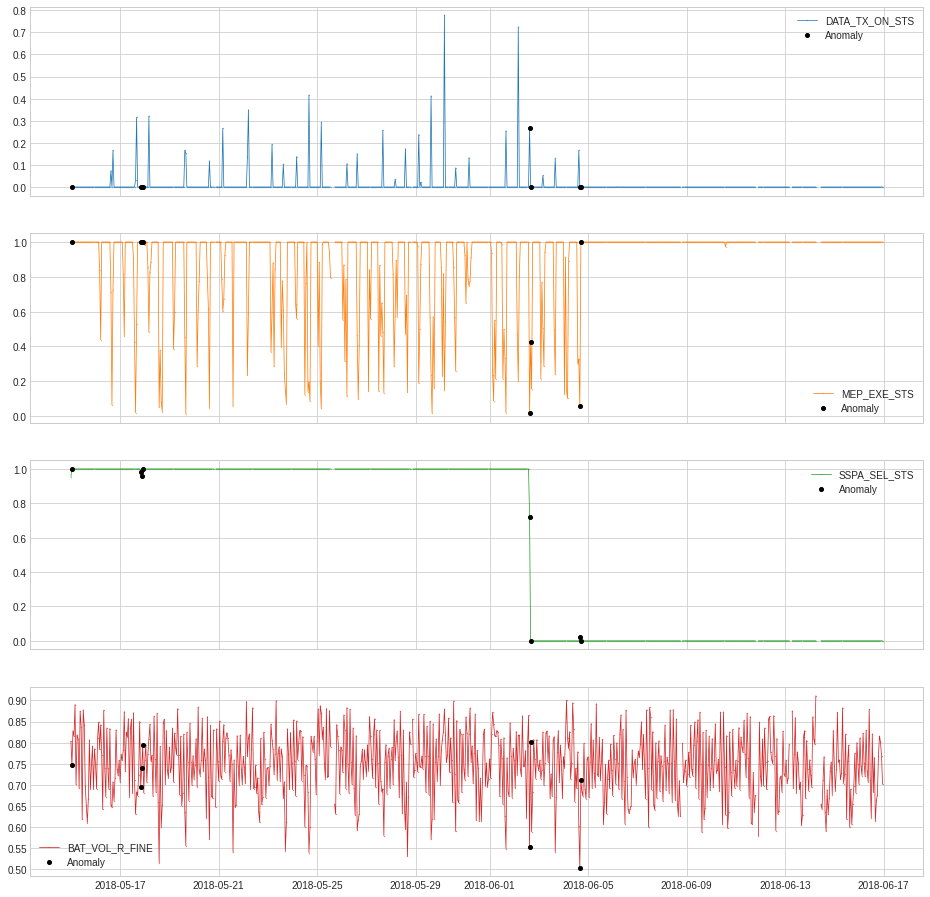

In [24]:

from adtk.detector import AutoregressionAD
from adtk.visualization import plot
from adtk.detector import CustomizedDetectorHD

df_resampled = df.resample('H').mean()
def detectionFunction(df):
    #Anomalies list is initially empty
    ano = pd.Series()
    # Go through each column, use auto regression and populate the anomalies list
    for column in df.columns[1:]:
        ar = AutoregressionAD(c=3.0).fit_detect(df[column]).fillna(0).replace(0.0, False).replace(1.0, True)
        print('-----------')
        print(column, ar[ar].index)
        ano = ano | ar
    return ano

customized_detector = CustomizedDetectorHD(detect_func=detectionFunction)
anomalies = customized_detector.detect(df_resampled)
print('Anomalies detected at')
print(anomalies[anomalies].index)
plot(df_resampled,legend=True, anomaly=anomalies, ts_linewidth=-.75, ts_markersize=0.5, anomaly_marker='o',anomaly_tag="marker", anomaly_color='black')


